In [2]:
import pandas as pd

In [3]:
import matplotlib

In [4]:
import os

In [9]:
os.getcwd()

'/content'

In [10]:
df = pd.read_csv("online_retail_II.csv", encoding="latin-1")

In [25]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [11]:
df.shape

(135110, 8)

In [12]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [13]:
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
Price,float64
Customer ID,float64
Country,object


#Description of each row
Single row in data set provides descriptions of individual item been ordered by customer wich include quantity price customer_id (Diff for each customer) ,invoice numnber and delivery country,decription of item etc



#Same cusotmer id and invoice

 Customer id and Invoice Can be same because same order can have multiple items so they are being placed under same invoice number and customer id


##Task 2

# units of analysis considered:
 1. invoice line
 gives product level detail
 ignores basket and customer context

 2. invoice / basket level
 shows basket size and total spend
 loses some product detail

 3. customer level
  shows overall customer behaviour
  loses timing of individual purchases

 chosen unit of analysis: customer
 this makes more sense for later analysis like segmentation
 and avoids treating non independent rows as separate observations

In [14]:
#Task 3


df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,1184
Quantity,0
InvoiceDate,0
Price,0
Customer ID,33950
Country,0


In [28]:
# 1

# 107927 rows are Missing Customer id
# This could effect analysis on customer level
# Remove these rows before analysis


In [15]:
df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
135105,502278,84993B,75 BLACK PETIT FOUR CASES,24,23/03/2010 16:37,0.42,15785.0,United Kingdom
135106,502278,21078,SET/20 STRAWBERRY PAPER NAPKINS,12,23/03/2010 16:37,0.85,15785.0,United Kingdom
135107,502278,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,23/03/2010 16:37,0.85,15785.0,United Kingdom
135108,502278,21380,WOODEN HAPPY BIRTHDAY GARLAND,6,23/03/2010 16:37,2.95,15785.0,United Kingdom


In [16]:
#2
# Negative values in Quantity represent return
# This effect later in calculating items sold and calcualting revenue of purchases
# remove these from purchases analysis

# 3
# Canceled incoices in invoices are not part of purchases
#they should be removed from purchase anlysis


### Data Cleaning

In [17]:
df_dup = df

In [18]:
(df["Quantity" ] < 0 ).sum()

np.int64(3662)

In [19]:
df_dup = df_dup[df_dup["Quantity"] > 0]

In [20]:
(df_dup["Quantity"] < 0 ).sum()

np.int64(0)

In [21]:
df_dup

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
135105,502278,84993B,75 BLACK PETIT FOUR CASES,24,23/03/2010 16:37,0.42,15785.0,United Kingdom
135106,502278,21078,SET/20 STRAWBERRY PAPER NAPKINS,12,23/03/2010 16:37,0.85,15785.0,United Kingdom
135107,502278,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,23/03/2010 16:37,0.85,15785.0,United Kingdom
135108,502278,21380,WOODEN HAPPY BIRTHDAY GARLAND,6,23/03/2010 16:37,2.95,15785.0,United Kingdom


In [22]:
df_dup

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
135105,502278,84993B,75 BLACK PETIT FOUR CASES,24,23/03/2010 16:37,0.42,15785.0,United Kingdom
135106,502278,21078,SET/20 STRAWBERRY PAPER NAPKINS,12,23/03/2010 16:37,0.85,15785.0,United Kingdom
135107,502278,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,23/03/2010 16:37,0.85,15785.0,United Kingdom
135108,502278,21380,WOODEN HAPPY BIRTHDAY GARLAND,6,23/03/2010 16:37,2.95,15785.0,United Kingdom


 Created a duplicate df so we dont detroy the orignal data set remived the rows with quantity negative the sum function shows there were 12326 values negative afterward after cleaniing them there are zero left also removung these deletd the invoices staring with c thus helps in customer level analysis.

In [23]:
(df_dup["Customer ID"]).isna().sum()

np.int64(33029)

In [24]:
df_dup=df_dup.dropna(subset=["Customer ID"])

In [25]:
(df_dup["Customer ID"]).isna().sum()

np.int64(0)

In [26]:
df_dup.shape

(98419, 8)

dropped rows with no or NA customer id

In [27]:
df_dup["InvoiceDate"].unique()

array(['01/12/2009 07:45', '01/12/2009 07:46', '01/12/2009 09:06', ...,
       '23/03/2010 15:56', '23/03/2010 16:01', '23/03/2010 16:37'],
      dtype=object)

In [28]:
df_dup["InvoiceDate"] = pd.to_datetime(df_dup["InvoiceDate"] , dayfirst= True
                                       )

/tmp/ipython-input-4220910135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup["InvoiceDate"] = pd.to_datetime(df_dup["InvoiceDate"] , dayfirst= True


In [29]:
df_dup

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
135105,502278,84993B,75 BLACK PETIT FOUR CASES,24,2010-03-23 16:37:00,0.42,15785.0,United Kingdom
135106,502278,21078,SET/20 STRAWBERRY PAPER NAPKINS,12,2010-03-23 16:37:00,0.85,15785.0,United Kingdom
135107,502278,21080,SET/20 RED SPOTTY PAPER NAPKINS,12,2010-03-23 16:37:00,0.85,15785.0,United Kingdom
135108,502278,21380,WOODEN HAPPY BIRTHDAY GARLAND,6,2010-03-23 16:37:00,2.95,15785.0,United Kingdom


Now the Date has been sorted with year month and date no more confusion in data regarding the date

### EDA

/tmp/ipython-input-1068525053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup["Revenue"] = df_dup["Quantity"] * df_dup["Price"]


,Revenue
InvoiceDate,
2009-12,686654.160
2010-01,557319.062
2010-02,506371.066
2010-03,499329.871


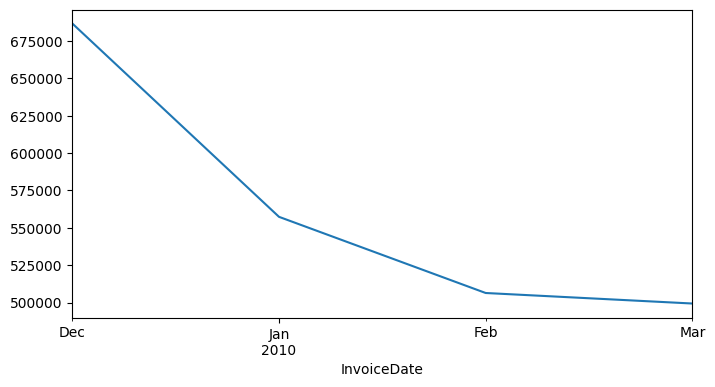

In [30]:
df_dup["Revenue"] = df_dup["Quantity"] * df_dup["Price"]

monthly_rev = df_dup.groupby(df_dup["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()

monthly_rev.plot(figsize=(8,4))
monthly_rev


#How does revenue change over time

#Key pattern

Revenue shows a clear upward trend with a strong peak toward year-end, suggesting seasonality.

#Limitation

December appears incomplete in the dataset, so the final peak may be underestimated or distorted.

<Axes: >

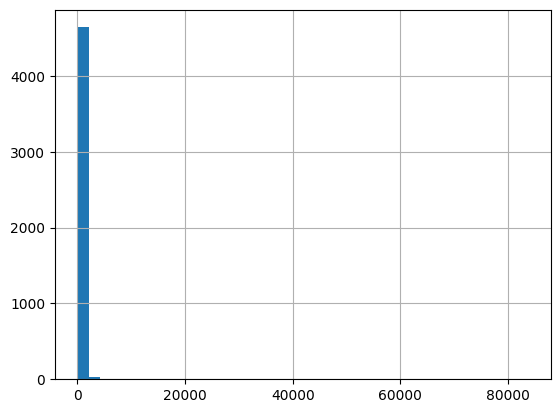

In [32]:
basket_qty = df_dup.groupby("Invoice")["Quantity"].sum()

basket_qty.describe()
basket_qty.hist(bins=40)


How large are baskets ?
#Key Pattern
Most invoices contain small quantities, while a small number of invoices have very large basket sizes
#Limitation
Basket size measured by quantity ignores product price differences and may not reflect basket value

<Axes: >

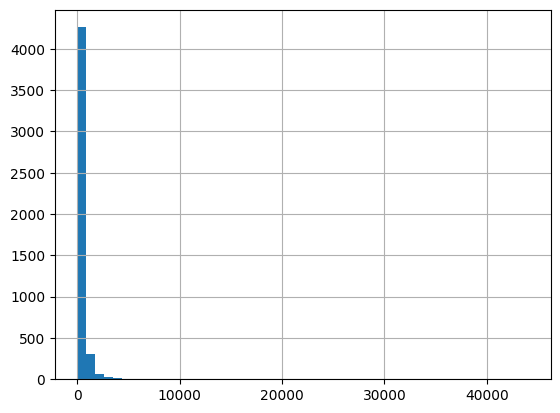

In [33]:
invoice_value = df_dup.groupby("Invoice")["Revenue"].sum()

invoice_value.describe()
invoice_value.hist(bins=50)


What is the distribution of invoice value?

#Key Pattern
Invoice values are highly rightskewed with many small purchases and a few very high value baskets

In [34]:
df_dup["Description"].value_counts().head(10)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,914
JUMBO BAG RED WHITE SPOTTY,410
STRAWBERRY CERAMIC TRINKET BOX,401
PACK OF 72 RETRO SPOT CAKE CASES,397
BAKING SET 9 PIECE RETROSPOT,332
HOME BUILDING BLOCK WORD,326
SCOTTIE DOG HOT WATER BOTTLE,312
RED SPOT HEART HOT WATER BOTTLE,312
RED HANGING HEART T-LIGHT HOLDER,312


Which products appear most frequently?

#Key Pattern
A small set of products dominates transaction frequency indicating strong product concentration

#Limitation
Frequency does not measure revenue impact cheap items may appear often but contribute little revenue

In [35]:
df_dup["Country"].value_counts().head(10)


,count
Country,
United Kingdom,90222
EIRE,2029
Germany,1834
France,1344
Netherlands,525
Spain,428
Cyprus,309
Belgium,223
Greece,165


Which countries account for most transactions?

#Key Pattern
One country contributes the majority of transactions with all other countries forming a long tail

#Limitation
Country counts reflect transaction volume not necessarily number of unique customers or revenue share

#task 6

# key insights:
# 1. the data is highly transactional and revenue shows clear seasonality with a peak towards the end of the year
# 2. most invoices contain very few items, while a small number of baskets are extremely large
# 3. a small number of products and one main country dominate total sales activity

# risks :
# 1. december appears to be incomplete which affects time based analysis
# 2. removing rows with missing customer id may bias results towards registered customers

# chosen unit of analysis going forward :
# customer level

# next step:
# create customer level features such as total spend and purchase frequency and explore customer segmentation